# [Hands-On] Prompt-based Sound Classification with CLAP

- Author : Sangkeun Jung (hugmanskj@gmail.com)

> Educational Purpose


## Introduction

This lecture is part of the prompt-based classification explanation series, specifically focusing on sound classification with the CLAP model in natural language processing (NLP) and audio processing tasks.

### What is CLAP?
CLAP (Contrastive Language-Audio Pre-training) is an extension of the CLIP (Contrastive Language-Image Pre-training) model, adapted for audio tasks. Developed by researchers at LAION, it applies the same contrastive learning approach as CLIP but to the **audio domain**. CLAP learns to align audio and textual representations in a shared embedding space, allowing it to perform various audio-language tasks effectively, including sound classification.

### Key features of CLAP:
  * It can understand and classify audio based on textual descriptions.
  * It enables zero-shot learning for audio classification tasks.
  * It bridges the gap between audio data and natural language understanding.

In this notebook, we'll explore how the CLAP model can be applied to classify audio samples, leveraging its capability to understand and interpret the content of audio based on textual descriptions. Unlike traditional models that rely solely on audio features, CLAP integrates textual understanding, offering a broader and more nuanced perspective on sound classification.

### Objectives:

  * Introduce the concept of CLAP and its applications in bridging audio and language.
  * Implement sound classification using the CLAP model on a selected dataset of environmental sounds.
  * Analyze and discuss the results and insights gained from utilizing CLAP for sound classification tasks.

Let's start by setting up our environment and importing the necessary libraries to dive into sound classification with CLAP!

## 1. Setting Up the Colab Environment
First, we need to install the required libraries:

In [ ]:
!pip install -q datasets transformers torch torchaudio

Now, let's import the necessary libraries:

In [ ]:
from datasets import load_dataset
from transformers import AutoProcessor, AutoModelForAudioClassification
import torch
import torchaudio
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

c:\Users\hugman\anaconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


## Download and Load the Dataset

We'll use the Urbansound8K dataset, which contains environmental sound recordings:

In [ ]:
# Load the UrbanSound8K dataset
dataset = load_dataset("danavery/urbansound8K") # <-- it takes time about 10min.

# Preview the dataset structure
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['audio', 'slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class'],
        num_rows: 8732
    })
})


In [ ]:
class_map = {
    0: "air_conditioner",
    1: "car_horn",
    2: "children_playing",
    3: "dog_bark",
    4: "drilling",
    5: "engine_idling",
    6: "gun_shot",
    7: "jackhammer",
    8: "siren",
    9: "street_music"
}

In [ ]:
class_names = list( set(dataset['train']['class']) )
print("Class names:", class_names)
print("# of Classes:", len(class_names))

Class names: ['air_conditioner', 'dog_bark', 'jackhammer', 'drilling', 'engine_idling', 'siren', 'gun_shot', 'car_horn', 'street_music', 'children_playing']
# of Classes: 10


## Load the CLAP Model and Processor

In [ ]:
from transformers import pipeline
classifier = pipeline(
    task="zero-shot-audio-classification", model="laion/clap-htsat-unfused"
)

c:\Users\hugman\anaconda3\envs\ml\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
from IPython.display import Audio, display

sample = dataset['train'][0]
# Extract the audio array and sampling rate
audio_array = sample['audio']['array']
sampling_rate = sample['audio']['sampling_rate']

# Extract the audio array and sampling rate
audio_array = sample['audio']['array']
sampling_rate = sample['audio']['sampling_rate']

# Display audio player
print("Audio Player:")
display(Audio(audio_array, rate=sampling_rate))

Audio Player:


## Testing pretrained model

In [ ]:
candidate_labels = [
    "This is the sound of an air conditioner",  # 0
    "This is the sound of a car horn",          # 1
    "This is the sound of children playing",    # 2
    "This is the sound of a dog barking",       # 3
    "This is the sound of drilling",            # 4
    "This is the sound of an engine idling",    # 5
    "This is the sound of a gunshot",           # 6
    "This is the sound of a jackhammer",        # 7
    "This is the sound of a siren",             # 8
    "This is the sound of street music"         # 9
]

In [ ]:
classifier(audio_array, candidate_labels=candidate_labels)

[{'score': 0.9870896935462952, 'label': 'This is the sound of a dog barking'},
 {'score': 0.009609753265976906, 'label': 'This is the sound of a car horn'},
 {'score': 0.0026358875911682844, 'label': 'This is the sound of a gunshot'},
 {'score': 0.00015646328392904252,
  'label': 'This is the sound of street music'},
 {'score': 0.00014046225987840444,
  'label': 'This is the sound of a jackhammer'},
 {'score': 0.00012717110803350806,
  'label': 'This is the sound of an engine idling'},
 {'score': 0.00010690320777939633, 'label': 'This is the sound of a siren'},
 {'score': 5.122936636325903e-05, 'label': 'This is the sound of drilling'},
 {'score': 4.7987767175072804e-05,
  'label': 'This is the sound of an air conditioner'},
 {'score': 3.4362590668024495e-05,
  'label': 'This is the sound of children playing'}]

## Classification via Prompt and Alignment - Simplified (Sound Version)
This code implements a method for sound classification by aligning text prompts with sound features.

Here's a streamlined overview of how this process works:

1. Text Prompt Creation : For each class, the code generates descriptive texts using predefined query_templates. These texts act as natural language prompts that describe potential content of the sounds.

2. Model Prediction
    - Model Input and Prediction: The processed inputs are fed into a model that calculates similarity scores between the sound and each text prompt. This step typically uses a neural network model that can evaluate the alignment between text and sound features.
    - Probability Calculation: A softmax function is applied to these scores to derive probabilities that indicate how likely it is that the sound matches each prompt.

4. Output Generation
    - Final Classification: The system identifies the prompt with the highest probability score as the most accurate description of the sound, effectively classifying the sound.
    - Returning Results: Additionally, the function returns human-readable versions of the used prompts and the probability scores, providing insight into the model’s decision-making process.

This method leverages natural language to enhance the model's ability to classify sounds without needing explicit labels for every new sound, supporting applications like zero-shot learning, where the model classifies sounds based on descriptions it has not been explicitly trained on.

## Evalute the Model

### Single Query Template

In [ ]:
simple_query_template = "This is the sound of a {sound}."

advanced_query_templates = [
    "This is the sound of a {sound}.",
    "You can hear a {sound}.",
    "The sound resembles {sound}.",
    "Listen to the {sound}.",
    "It sounds like a {sound}.",
    "The noise is similar to a {sound}.",
    "This noise could be a {sound}.",
    "Imagine the sound of a {sound}.",
    "A distinct sound of a {sound}.",
    "This audio clip features a {sound}.",
    "What you’re hearing is a {sound}.",
    "This audio resembles a {sound}.",
    "A recognizable sound of a {sound}.",
    "You might think this is a {sound}.",
    "This is a clear example of a {sound}."
]

In [ ]:
# Function to classify a single audio sample using a single query template
def classify_audio_single_template(audio_array, query_template, classifier, class_map):
    candidate_labels = [query_template.format(sound=class_map[i]) for i in range(len(class_map))]
    results = classifier(audio_array, candidate_labels=candidate_labels)
    return results[0]['label']

In [ ]:
# Function to classify a single audio sample using multiple query templates
def classify_audio_multiple_templates(audio_array, query_templates, classifier, class_map):
    aggregated_scores = np.zeros(len(class_map))
    for template in query_templates:
        candidate_labels = [template.format(sound=class_map[i]) for i in range(len(class_map))]
        results = classifier(audio_array, candidate_labels=candidate_labels)
        for result in results:
            index = candidate_labels.index(result['label'])
            aggregated_scores[index] += result['score']

    predicted_label = candidate_labels[np.argmax(aggregated_scores)]
    return predicted_label

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import torch
import numpy as np

# Function to evaluate the model
def evaluate_model(dataset, query_templates, classifier, class_map, use_multiple_templates=False):
    y_true = []
    y_pred = []

    for sample in dataset:
        audio_array = sample['audio']['array']
        true_label = sample['class']

        if use_multiple_templates:
            predicted_label = classify_audio_multiple_templates(audio_array, query_templates, classifier, class_map)
        else:
            predicted_label = classify_audio_single_template(audio_array, query_templates[0], classifier, class_map)

        # Extract class ID from the predicted label
        predicted_class_id = next(k for k, v in class_map.items() if v in predicted_label)

        y_true.append(true_label)
        y_pred.append(class_map.get(predicted_class_id))


    return y_true, y_pred

In [ ]:
# Create a smaller dataset with only the first 100 samples
eval_dataset = dataset['train'].select(range(1000))

In [ ]:
# Evaluate the model with a simple template (it takes about 3min)
true_labels, pred_labels = evaluate_model(eval_dataset, [simple_query_template], classifier, class_map, use_multiple_templates=False)

In [ ]:
def report_result(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_map[i] for i in range(len(class_map))])

    # Print metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Display confusion matrix
    disp.plot(cmap='viridis', xticks_rotation='vertical')
    plt.show()

Accuracy: 0.771
Precision: 0.8007575858379794
Recall: 0.771
F1 Score: 0.765463903683055


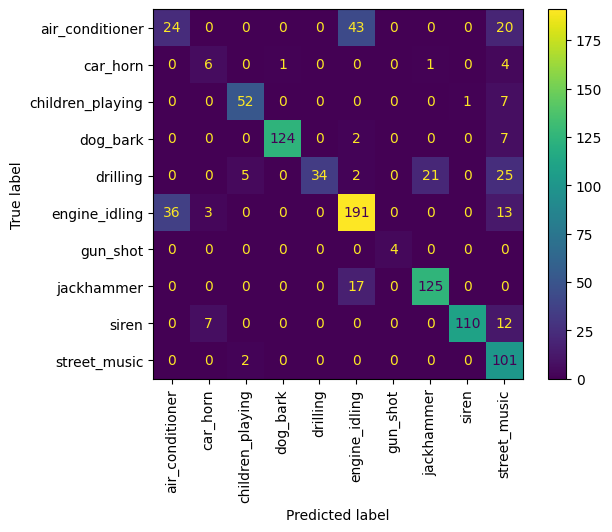

In [ ]:
report_result(true_labels, pred_labels)

### Multiple Query Template

In [ ]:
# Evaluate the model with advanced templates
true_labels, pred_labels = evaluate_model(eval_dataset, advanced_query_templates, classifier, class_map, use_multiple_templates=True)

Accuracy: 0.779
Precision: 0.8215213596913493
Recall: 0.779
F1 Score: 0.7813645114316407


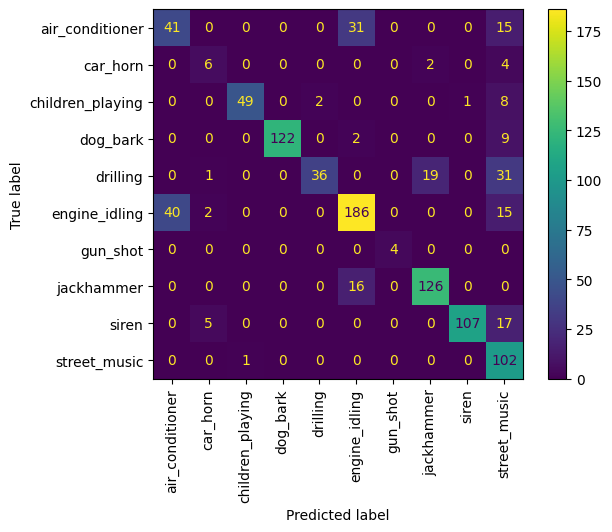

In [ ]:
report_result(true_labels, pred_labels)

As you can see, the performance, which was 0.76 when using a single query template, increased to 0.78 solely through post-processing without any additional training.
However, a downside is that the computation time also increased accordingly.

## Conclusion
In this notebook, we have explored the use of the CLAP model for prompt-based sound classification, successfully demonstrating how audio can be classified using textual descriptions.

Here are the key takeaways:

1. Effective Integration of Audio and Text: CLAP has shown how audio content can be effectively classified based on textual prompts, leveraging its ability to align audio and textual features within a shared embedding space.
2. Zero-Shot Learning Capability: The model's ability to classify sounds without explicit training on specific audio data highlights the potential of zero-shot learning in audio processing tasks.
3. Versatile Sound Representations: Through the use of multiple query templates, we have demonstrated how the model can aggregate textual descriptions to improve classification accuracy, further emphasizing the flexibility of prompt-based approaches.
4. Enhanced Performance with Multiple Templates: Notably, we observed that by utilizing multiple query templates, it is possible to achieve better classification performance without the need for additional training. This indicates that the diversity of prompts can enrich the model's understanding and lead to more accurate predictions.
5. Insightful Evaluation: The analysis of accuracy, precision, recall, and F1-score, along with the confusion matrix, has provided valuable insights into the performance of CLAP in sound classification, showing its strengths and areas for improvement.


By using the CLAP model, we have opened up new possibilities for sound classification, where the integration of natural language processing and audio analysis offers a richer, more adaptable approach to understanding and categorizing sound. This methodology not only bridges the auditory and textual domains but also paves the way for future innovations in audio classification and NLP applications. ​